In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
#Set all the constants
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Flowers",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 4317 files belonging to 5 classes.


In [5]:
class_names = dataset.class_names

In [6]:
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [7]:
len(dataset)

135

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[4 4 1 1 4 0 1 4 3 2 0 1 4 1 4 4 2 1 0 0 1 0 2 3 4 4 1 1 4 0 3 4]


0 ---> Daisy<br>1 ---> Dandelion<br>2 ---> Rose<br>3 --->Sunflower<br>4 ---> Tulip

In [9]:
# First image
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


## Visualize some of the images

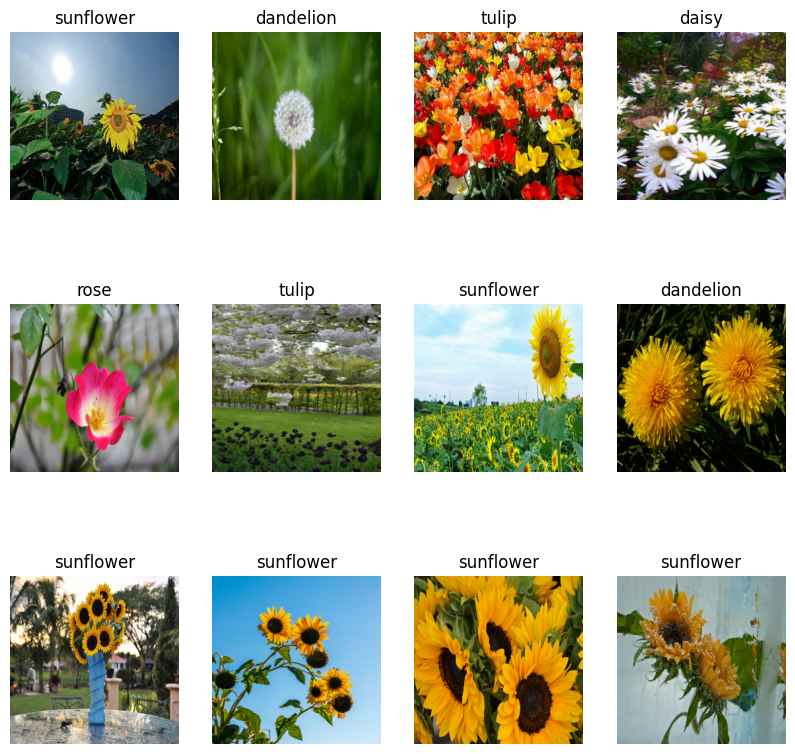

In [23]:

plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [24]:
len(dataset)

135

80% ==> Training<br>
20% ==> 10% validation,10% test

In [25]:
train_size = 0.8
len(dataset)*train_size

108.0

In [29]:
#Taking first 108 as training dataset

In [33]:
train_ds = dataset.take(108)
len(train_ds)

108

In [34]:
#Skipping first 108 and getting the remaining
test_ds = dataset.skip(108)
len(test_ds)

27

In [35]:
val_size = 0.1
len(dataset)*val_size

13.5

In [36]:
val_ds = test_ds.take(13)
len(val_ds)

13

In [37]:
test_ds = test_ds.skip(13)
len(test_ds)

14

In [38]:
def get_dataset_partitions_tf(ds,train_split = 0.8, val_split=0.1,shuffle=True,shuffle_size = 1000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed =12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split* ds_size)

    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size).skip(val_size)


    return train_ds,val_ds,test_ds

In [39]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [40]:
len(train_ds)

108

In [44]:
len(val_ds)

13

In [42]:
len(test_ds)

14

In [43]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)